In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

### Reading CSV

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\4BHIJEET\python\Zomato EDA\zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [20]:
df.shape

(51717, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Data Cleaning

#### 1. Dropping Unecessary Columns

In [23]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [25]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'reviews_list'], axis =1) 


KeyError: "['url', 'address', 'phone', 'menu_item', 'reviews_list'] not found in axis"

In [28]:
df = df.drop(['dish_liked'], axis =1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#### 2. Dropping Duplicate Values

In [35]:
df.drop_duplicates(inplace = True)
df.shape

(51609, 11)

#### 3. Cleaning Rate Columns

In [36]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Creating Function to clean rate columns

In [48]:
def newrate(value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    else:
        value= str(value).split('/')
        value=value[0]
        return float(value)

In [49]:
df['rate'] = df['rate'].apply(newrate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

#### 4. Finding Null Values and replacing them with "Mean" of Rate values

In [50]:
df.rate.isnull().sum()

10019

In [51]:
df['rate'].fillna(df['rate'].mean(), inplace = True)

In [52]:
df.rate.isnull().sum()

0

#### 5. Dropping Null Values

In [57]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


#### 6. Renaming Column Names

In [63]:
df.rename(columns= {'approx_cost(for two people)' : 'Cost2Plates', 'listed_in(type)' : 'Type'}, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51042 non-null  object 
 1   online_order     51042 non-null  object 
 2   book_table       51042 non-null  object 
 3   rate             51042 non-null  float64
 4   votes            51042 non-null  int64  
 5   location         51042 non-null  object 
 6   rest_type        51042 non-null  object 
 7   cuisines         51042 non-null  object 
 8   Cost2Plates      51042 non-null  object 
 9   Type             51042 non-null  object 
 10  listed_in(city)  51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


listed_in(city) and location contains redundant values; so dropping the listed_in(city) Column

In [65]:
df.drop(['listed_in(city)'], axis =1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#### 7. Removing "," From Cost2Plates

In [69]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    

In [70]:
df['Cost2Plates'] = df['Cost2Plates'].apply(handlecomma)
df['Cost2Plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

#### 8. Clustering Values from column having less Frequencies


 1. Rest Types Column

In [74]:
df['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [75]:
rest_types = df['rest_type'].value_counts(ascending = False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [76]:
rest_types_withothers = rest_types[rest_types <1000] #stored values of restaurants having less than 1000 freq
rest_types_withothers

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [77]:
#now replacing values with "others" if the value is less than 1000 by creating a function

def handle_rest_types(value):
    if(value in rest_types_withothers):
        return 'others'
    else:
        return value
    

In [78]:
df['rest_type'] = df['rest_type'].apply(handle_rest_types) #replaced values with others
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

2. Location Column

In [142]:
location = df['location'].value_counts(ascending = False)

In [146]:
location_with_others = location[location < 100] #stored values in a variable having less than 100 frequency
location_with_others

Series([], Name: location, dtype: int64)

In [144]:
#now replacing values with "others" if the value is less than 100 by creating a function

def handle_location(value):
    if(value in location_with_others):
        return 'others'
    else:
        return value

In [145]:
df['location'] = df['location'].apply(handle_location) #replaced values with others
df['location'].value_counts(ascending = False)

BTM                      5056
others                   3402
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

3. Cleaning Cuisines Column

In [167]:
cuisines =df['cuisines'].value_counts(ascending = False)


In [173]:
cuisines_with_others = cuisines[cuisines < 100]  #stored values in a variable having less than 100 frequency         
cuisines_with_others 


Series([], Name: cuisines, dtype: int64)

In [174]:
#now replacing values with "others" if the value is less than 50 by creating a function

def handle_cuisines(value):
    if(value in cuisines_with_others):
        return 'others'
    else:
        return value

In [175]:
df['cuisines'] = df['cuisines'].apply(handle_cuisines) #replaced values with others
df['cuisines'].value_counts(ascending = False)

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

### Visualization

1.Number of Restaurants around different Locations

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Bommanahalli'),
  Text(8, 0, 'Electronic City'),
  Text(9, 0, 'HSR'),
  Text(10, 0, 'Marathahalli'),
  Text(11, 0, 'Wilson Garden'),
  Text(12, 0, 'Shanti Nagar'),
  Text(13, 0, 'Koramangala 5th Block'),
  Text(14, 0, 'Koramangala 8th Block'),
  Text(15, 0, 'Richmond Road'),
  Text(16, 0, 'Koramangala 7th Block'),
  Text(17, 0, 'Koramangala 4th Block'),
  Text(18, 0, 'Bellandur'),
  Text(19, 0, 'Sarjapur Road'),
  Text(20, 0, 'Whitefield'),
  Text(21, 0, 'Old Airport Road'),
  Text(22, 0, 'Indiranagar'),
  Text(23, 0, 'Koramangala 1st Block'),
  Text(24, 0, 'Frazer Tow

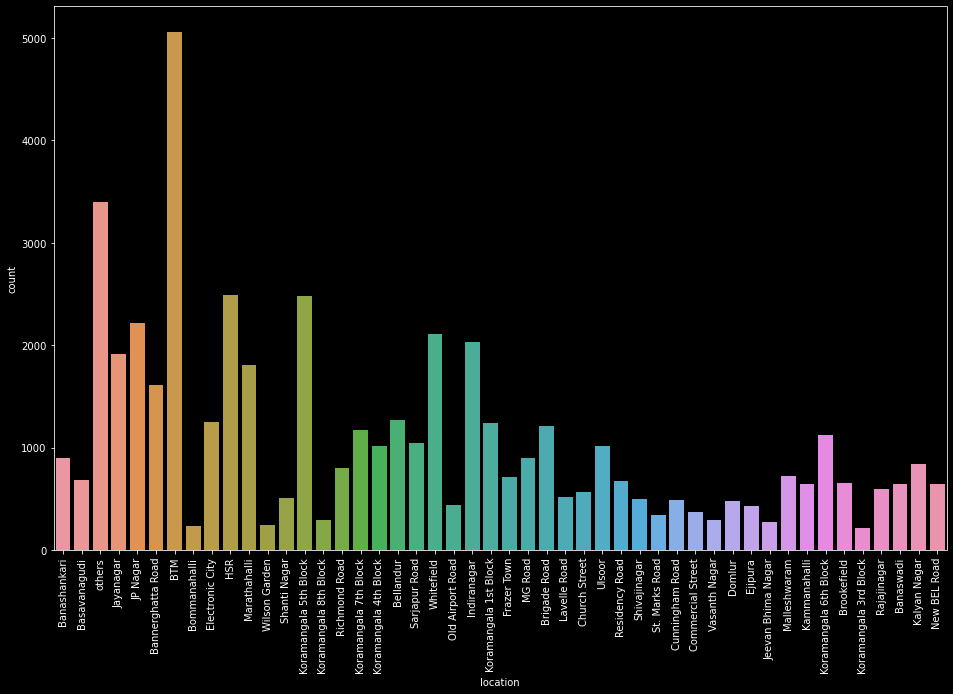

In [178]:
plt.figure(figsize= (16,10))
ax = sns.countplot(df['location']) #countplot -> gives the total count of a value
plt.xticks(rotation = 90)

2. Restaurants having Online Order Service (Yes/No)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


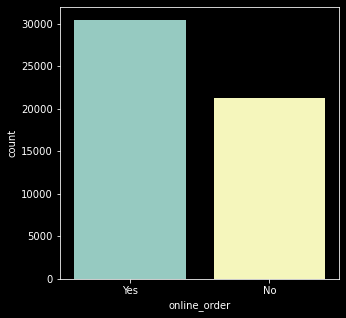

In [3]:
plt.figure(figsize = (5,5))

ax = sns.countplot(df['online_order'])

3. Restaurants having Booking Table Facility (Yes/No)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


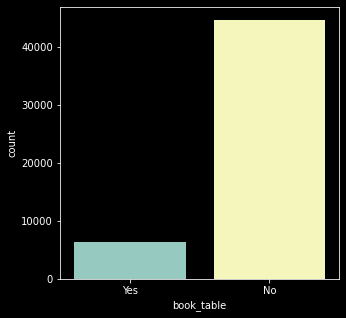

In [185]:
plt.figure(figsize=(5,5))

ax = sns.countplot(df['book_table'])

4. Comparing Rating of restaurants if they have Online Order Facility.

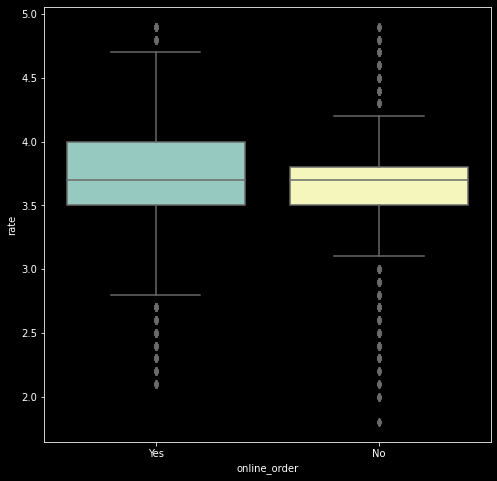

In [186]:
plt.figure(figsize =(8,8))

ax = sns.boxplot(x = 'online_order', y = 'rate', data = df)

5. Comparing Rating of restaurants if they have Booking Table Facility.

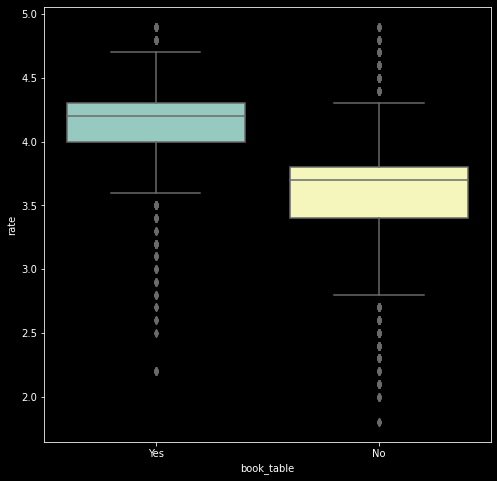

In [187]:
plt.figure(figsize = (8,8))

ax = sns.boxplot(x ='book_table', y='rate', data = df)

6. Comparing Order Online Facility Location-wise

In [197]:
#To achieve the task groupby and pivot table should be used

df1 = df.groupby(['location', 'online_order'])['name'].count() #location and online order is grouped
df1.to_csv('location_online_csv') #grouped data is now saved to new df

df1 = pd.read_csv('location_online_csv') #reading new df
df1 = pd.pivot_table(df1, values=None, index=['location'], columns =['online_order'], fill_value=0, aggfunc=np.sum) #making pivot table

df1


name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Bommanahalli            121   115
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Jeevan Bhima Nagar       68   200
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 3rd Block    91   124
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Koramangala 8th Block    82   212
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Vasanth Nagar           146   147
Whitefield              986  1119
Wilson Garden           112   134
others                 1444  1958

<AxesSubplot:xlabel='location'>

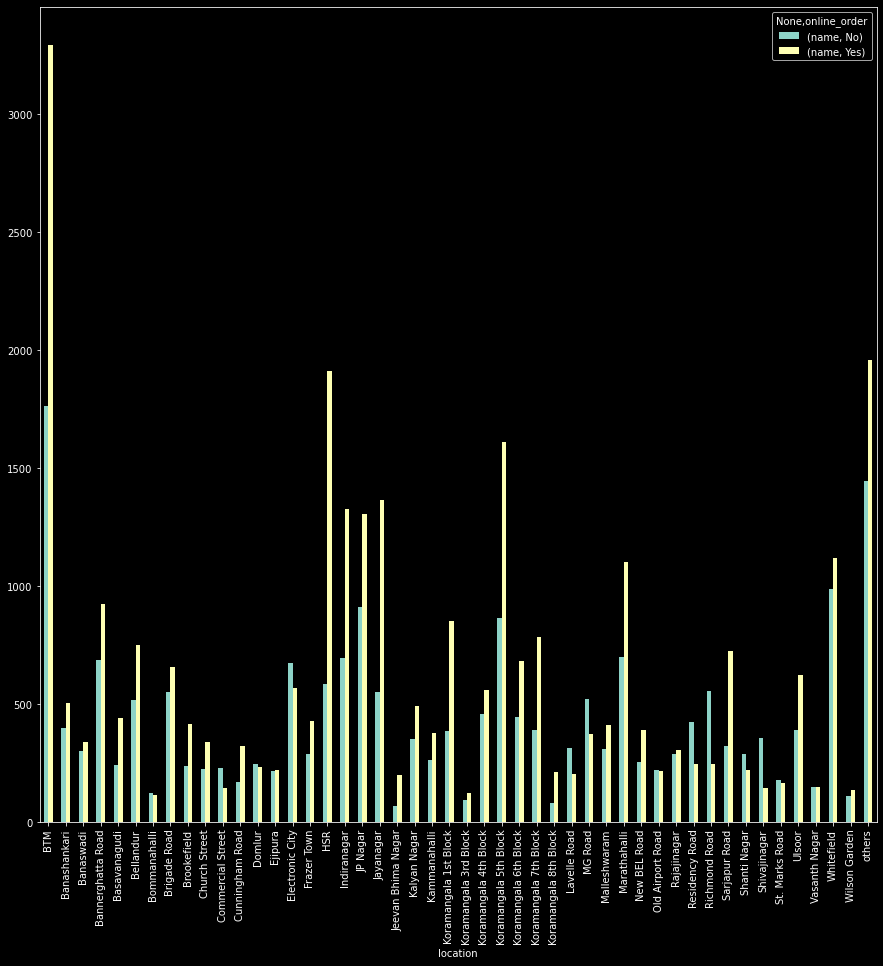

In [208]:
df1.plot(kind ='bar', figsize =(15,15))

7. Comparing Booking Table Facility Location-wise

In [214]:
#To achieve the task groupby and pivot table should be used

df2 = df.groupby(['location', 'book_table'])['name'].count() #location and online order is grouped
df2.to_csv('location_booktable_csv') #grouped data is now saved to new df

df2 = pd.read_csv('location_booktable_csv') #reading new df
df2 = pd.pivot_table(df2, values=None, index=['location'], columns =['book_table'], fill_value=0, aggfunc=np.sum) #making pivot table

df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Bommanahalli            233    3
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Jeevan Bhima Nagar      264    4
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 3rd Block   106  109
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Koramangala 8th Block   277   17
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Vasanth Nagar           276   17
Whitefield             1852  253
Wilson Garden           241    5
others                 3190  212

<AxesSubplot:xlabel='location'>

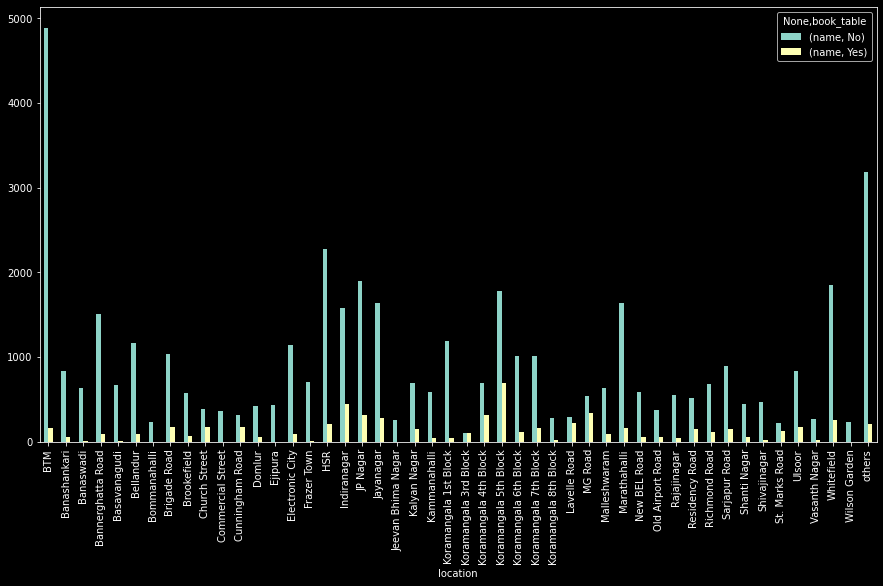

In [212]:
df2.plot(kind ='bar', figsize=(15,8))

8. Types of Restaurants and their ratings.

<AxesSubplot:xlabel='Type', ylabel='rate'>

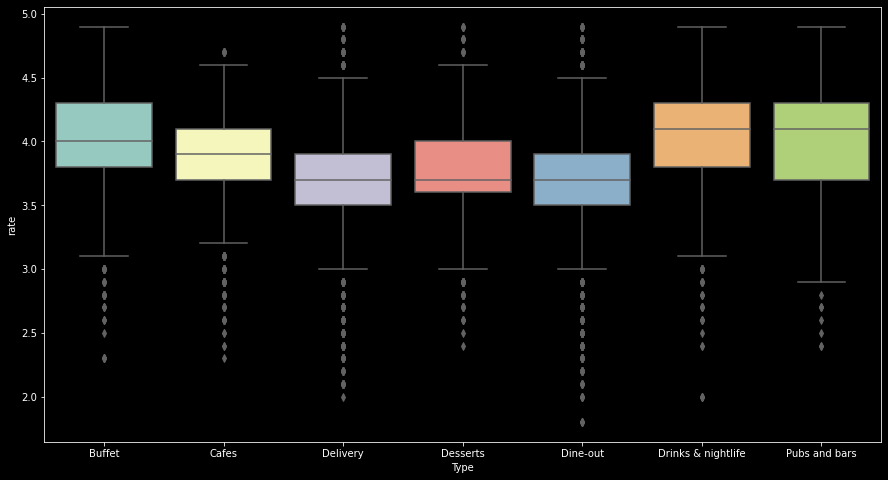

In [216]:
plt.figure(figsize =(15,8))
sns.boxplot(x = 'Type', y='rate', data = df)

9. Types of Restaurants Location-wise

In [219]:
#To achieve the task groupby and pivot table should be u sed

df3 = df.groupby(['location', 'Type'])['name'].count() #location and online order is grouped
df3.to_csv('TypeR_location_csv') #grouped data is now saved to new df

df3 = pd.read_csv('TypeR_location_csv') #reading new df
df3 = pd.pivot_table(df3, values=None, index=['location'], columns =['Type'], fill_value=0, aggfunc=np.sum) #making pivot table

df3


name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Bommanahalli               2     1      145       11       75   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Jeevan Bhima Nagar         0     6      139       18      105   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 3rd Block     19    20       81       17       65   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Koramangala 8th Block      0    10      199       24       59   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Vasanth Nagar              4    16      152       12      104   
Whitefield                28    51     1041      137      768   
Wilson Garden              3     2      133       19       86   
others                    55    78     1938      175     1059   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Bommanahalli                           1             1  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street           

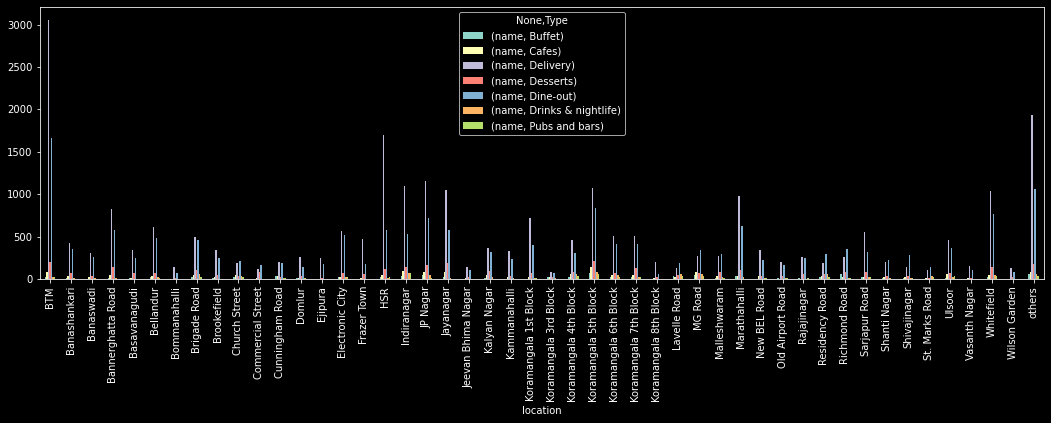

In [247]:
ax= df3.plot(kind ='bar', figsize=(18,5))


10. Number of Votes, Location-wise.

In [262]:
df4 = df[['location','votes']] #created new df having two columns location and votes
df4.drop_duplicates() #dropped duplicates

df5 = df4.groupby(['location'])['votes'].sum() #grouped the location and took the sum of the votes accordingly
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending = False) #sorted votes in descending order
df5.head()

,votes
location,
Koramangala 5th Block,2219506
Indiranagar,1196007
Koramangala 4th Block,685156
BTM,619376
Church Street,594979


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'BTM'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Lavelle Road'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Koramangala 7th Block'),
  Text(9, 0, 'Jayanagar'),
  Text(10, 0, 'Whitefield'),
  Text(11, 0, 'Koramangala 6th Block'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'MG Road'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Residency Road'),
  Text(17, 0, 'Cunningham Road'),
  Text(18, 0, 'St. M

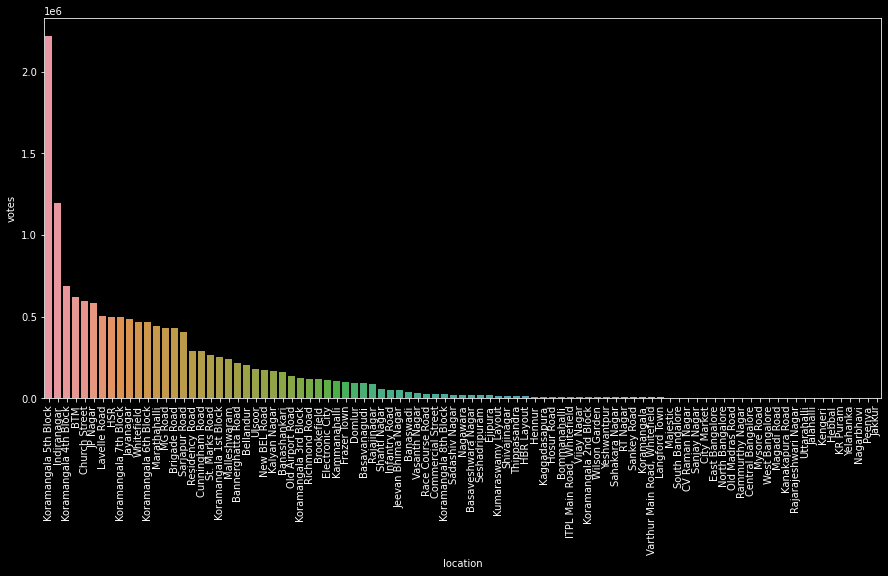

In [271]:
plt.figure(figsize=(15,7))
sns.barplot(df5.index, df5['votes'])
plt.xticks(rotation = 90)